In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread(r"../DATA/sammy.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

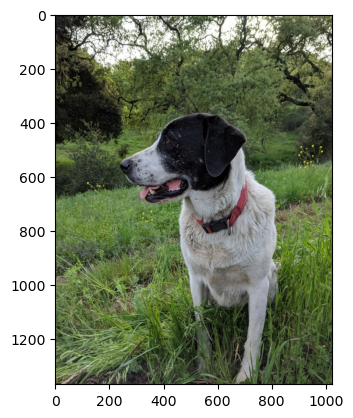

In [4]:
plt.imshow(full)

In [5]:
face = cv2.imread(r"../DATA/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

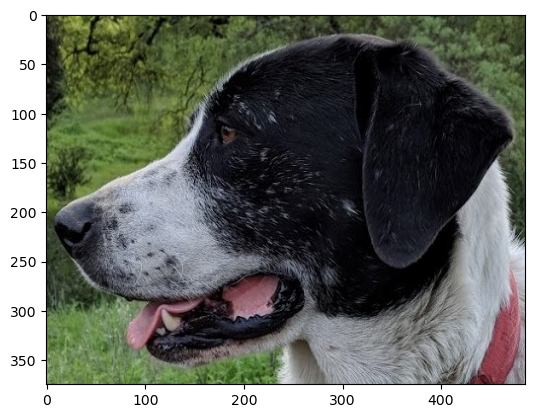

In [6]:
plt.imshow(face)

In [7]:
face.shape

(375, 486, 3)

In [8]:
full.shape

(1367, 1025, 3)

In [9]:
mystring="sum"

In [10]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [11]:
myfunc=eval("sum")

In [12]:
myfunc([1,2,3])

6

In [13]:
#ALL the 6 methods for comparison a list
#Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

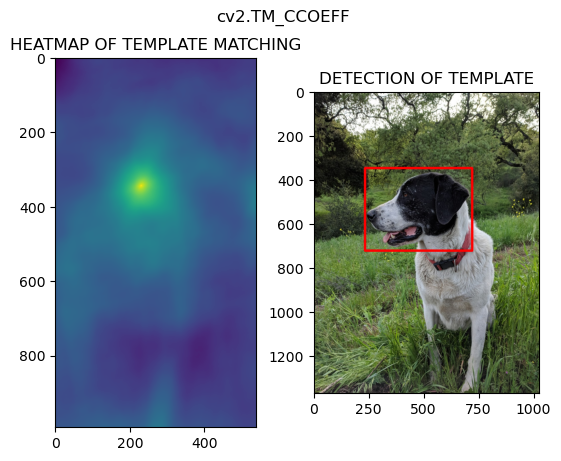

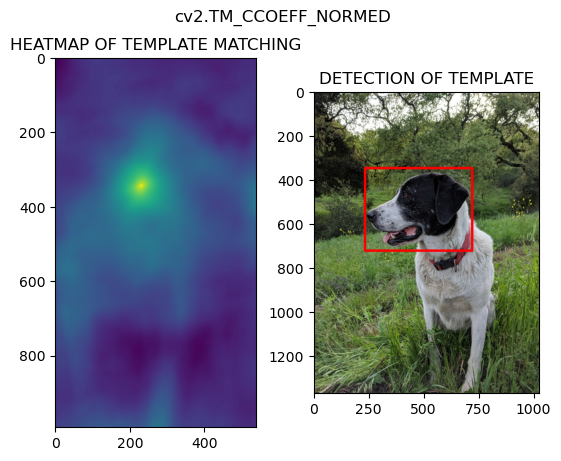

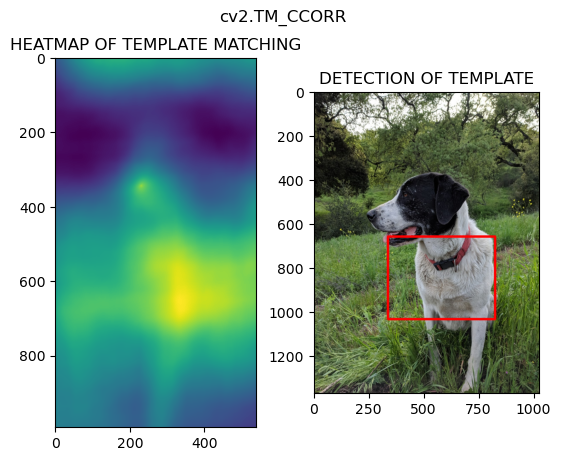

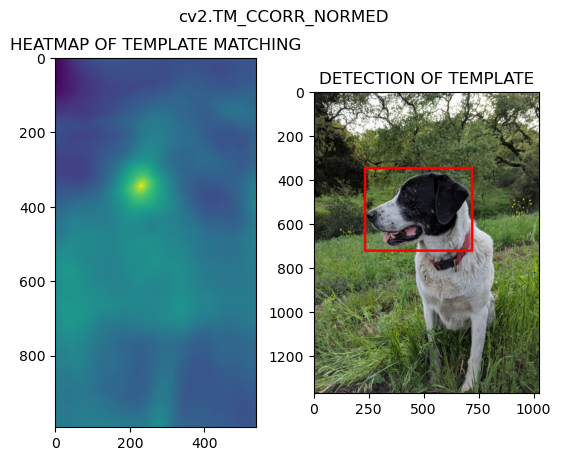

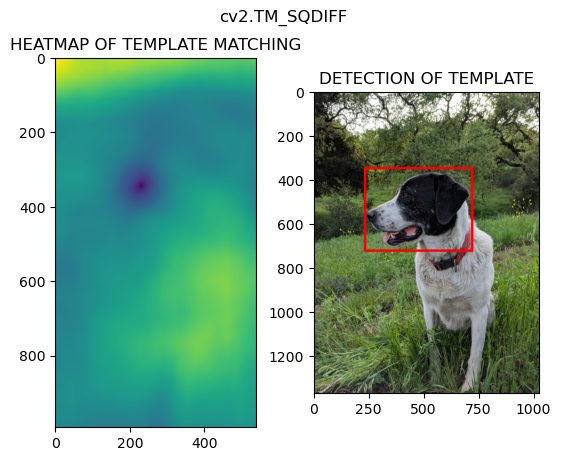

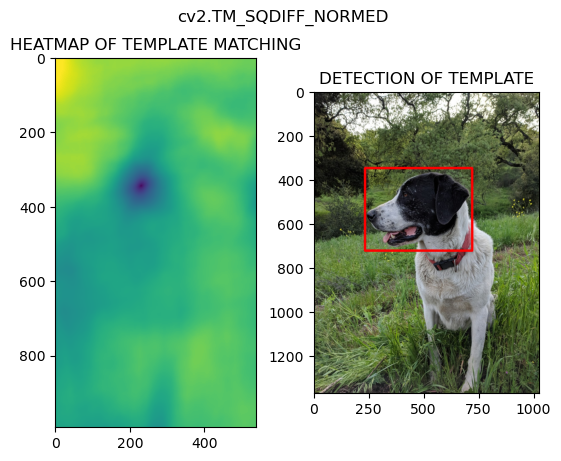

In [17]:
for m in methods:
    #CREATE a copy
    full_copy=full.copy()
    
    method = eval(m)
    
    #Template matching
    res=cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
        
    height,width,channels=face.shape
    
    bottom_right=(top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #PLOT AND SHOW THE IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE MATCHING")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("DETECTION OF TEMPLATE")
    #TITLE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    
    print("\n \n")